<h2>Project Table of Contents</h2>
<table border="1" cellpadding="10" cellspacing="0" style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Step No.</th>
      <th>Description</th>
      <th>Command / Action</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>GPU Check (Optional)</td>
      <td><code>!nvidia-smi</code></td>
    </tr>
    <tr>
      <td>2</td>
      <td>Set Current Directory</td>
      <td><code>os.getcwd()</code></td>
    </tr>
    <tr>
      <td>3</td>
      <td>Install Required Libraries</td>
      <td><code>pip install ultralytics supervision roboflow</code></td>
    </tr>
    <tr>
      <td>4</td>
      <td>Download Dataset from Roboflow</td>
      <td>Use Roboflow API</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Train YOLO Model</td>
      <td><code>yolo task=detect mode=train</code></td>
    </tr>
    <tr>
      <td>6</td>
      <td>Validate Training Outputs</td>
      <td>Analyze results and confusion matrix</td>
    </tr>
    <tr>
      <td>7</td>
      <td>Predict Using Trained Model</td>
      <td>Generate and visualize predictions</td>
    </tr>
  </tbody>
</table>


### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [3]:
!nvidia-smi

Tue Apr 29 11:26:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [5]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

<p><strong>NOTE:</strong> In this project, we are training a YOLOv11 model for pistol detection. Make sure your dataset is downloaded and located properly. We have used our custom dataset <strong>"pistol_deduction"</strong> from Roboflow. While downloading, ensure that you select the <code>yolov11</code> export format. By default, the dataset is placed in the <code>datasets</code> directory. If you want to change the default dataset location, you can modify it through Ultralytics' <code>settings.json</code> file.</p>

<div class="short-note">
  <p><strong>Dataset Source:</strong> Custom "pistol_deduction" from Roboflow</p>
  <p><strong>Format:</strong> YOLOv11 (select during export)</p>
  <p><strong>Default Location:</strong> <code>./datasets/</code></p>
  <p><strong>Note:</strong> Modify path in <code>settings.json</code> if needed</p>
</div>

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="U6Df9a4lOjPxysxGeLdS")
project = rf.workspace("syed-abdul-raheem").project("pistol_deduction")
version = project.version(2)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pistol_Deduction-2 in yolov11:: 100%|██████████| 1534/1534 [00:00<00:00, 5077.74it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 219MB/s]
New https://pypi.org/project/ultralytics/8.3.120 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Pistol_Deduction-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, 

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix_normalized.png			    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1745926100.2aa198480241.1452.0  train_batch440.jpg
F1_curve.png					    train_batch441.jpg
labels_correlogram.jpg				    train_batch442.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    weights
results.png


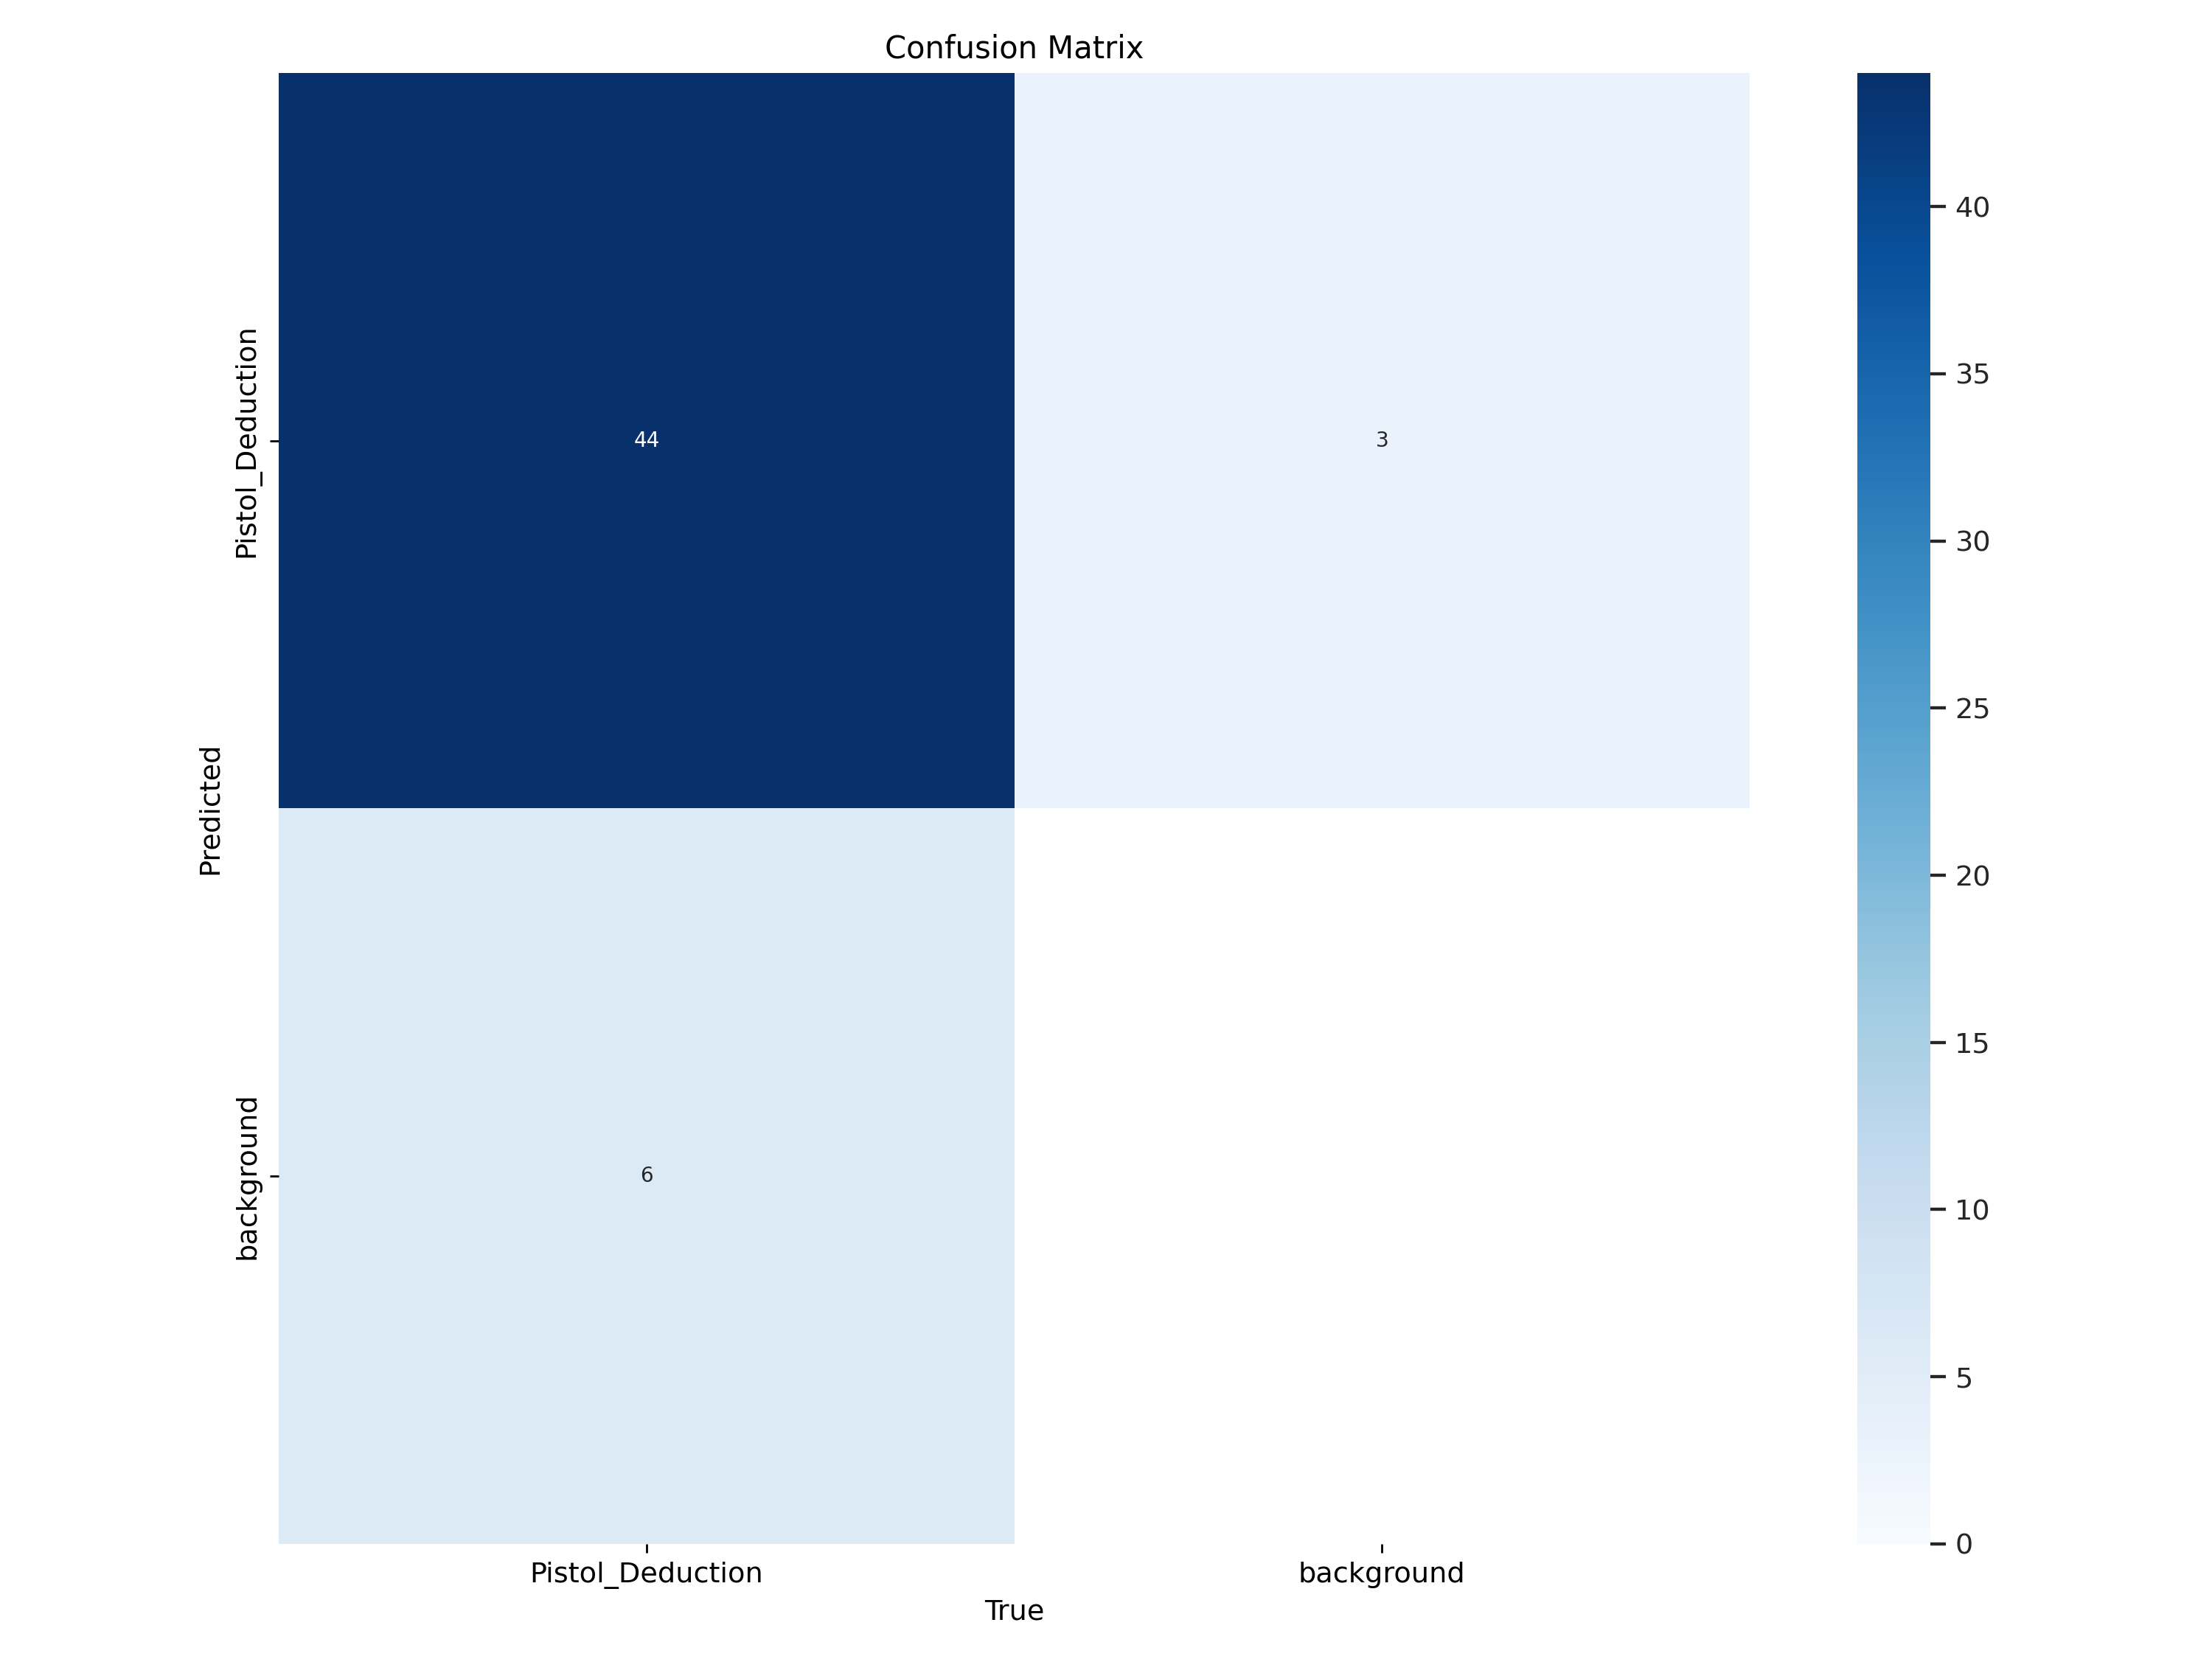

In [9]:
# from IPython.display import Image as IPyImage

# IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

from IPython.display import Image as IPyImage, display
import os

image_path = f'{HOME}/runs/detect/train/confusion_matrix.png'

if os.path.exists(image_path):
    display(IPyImage(filename=image_path))
else:
    print("Confusion matrix image not found.")

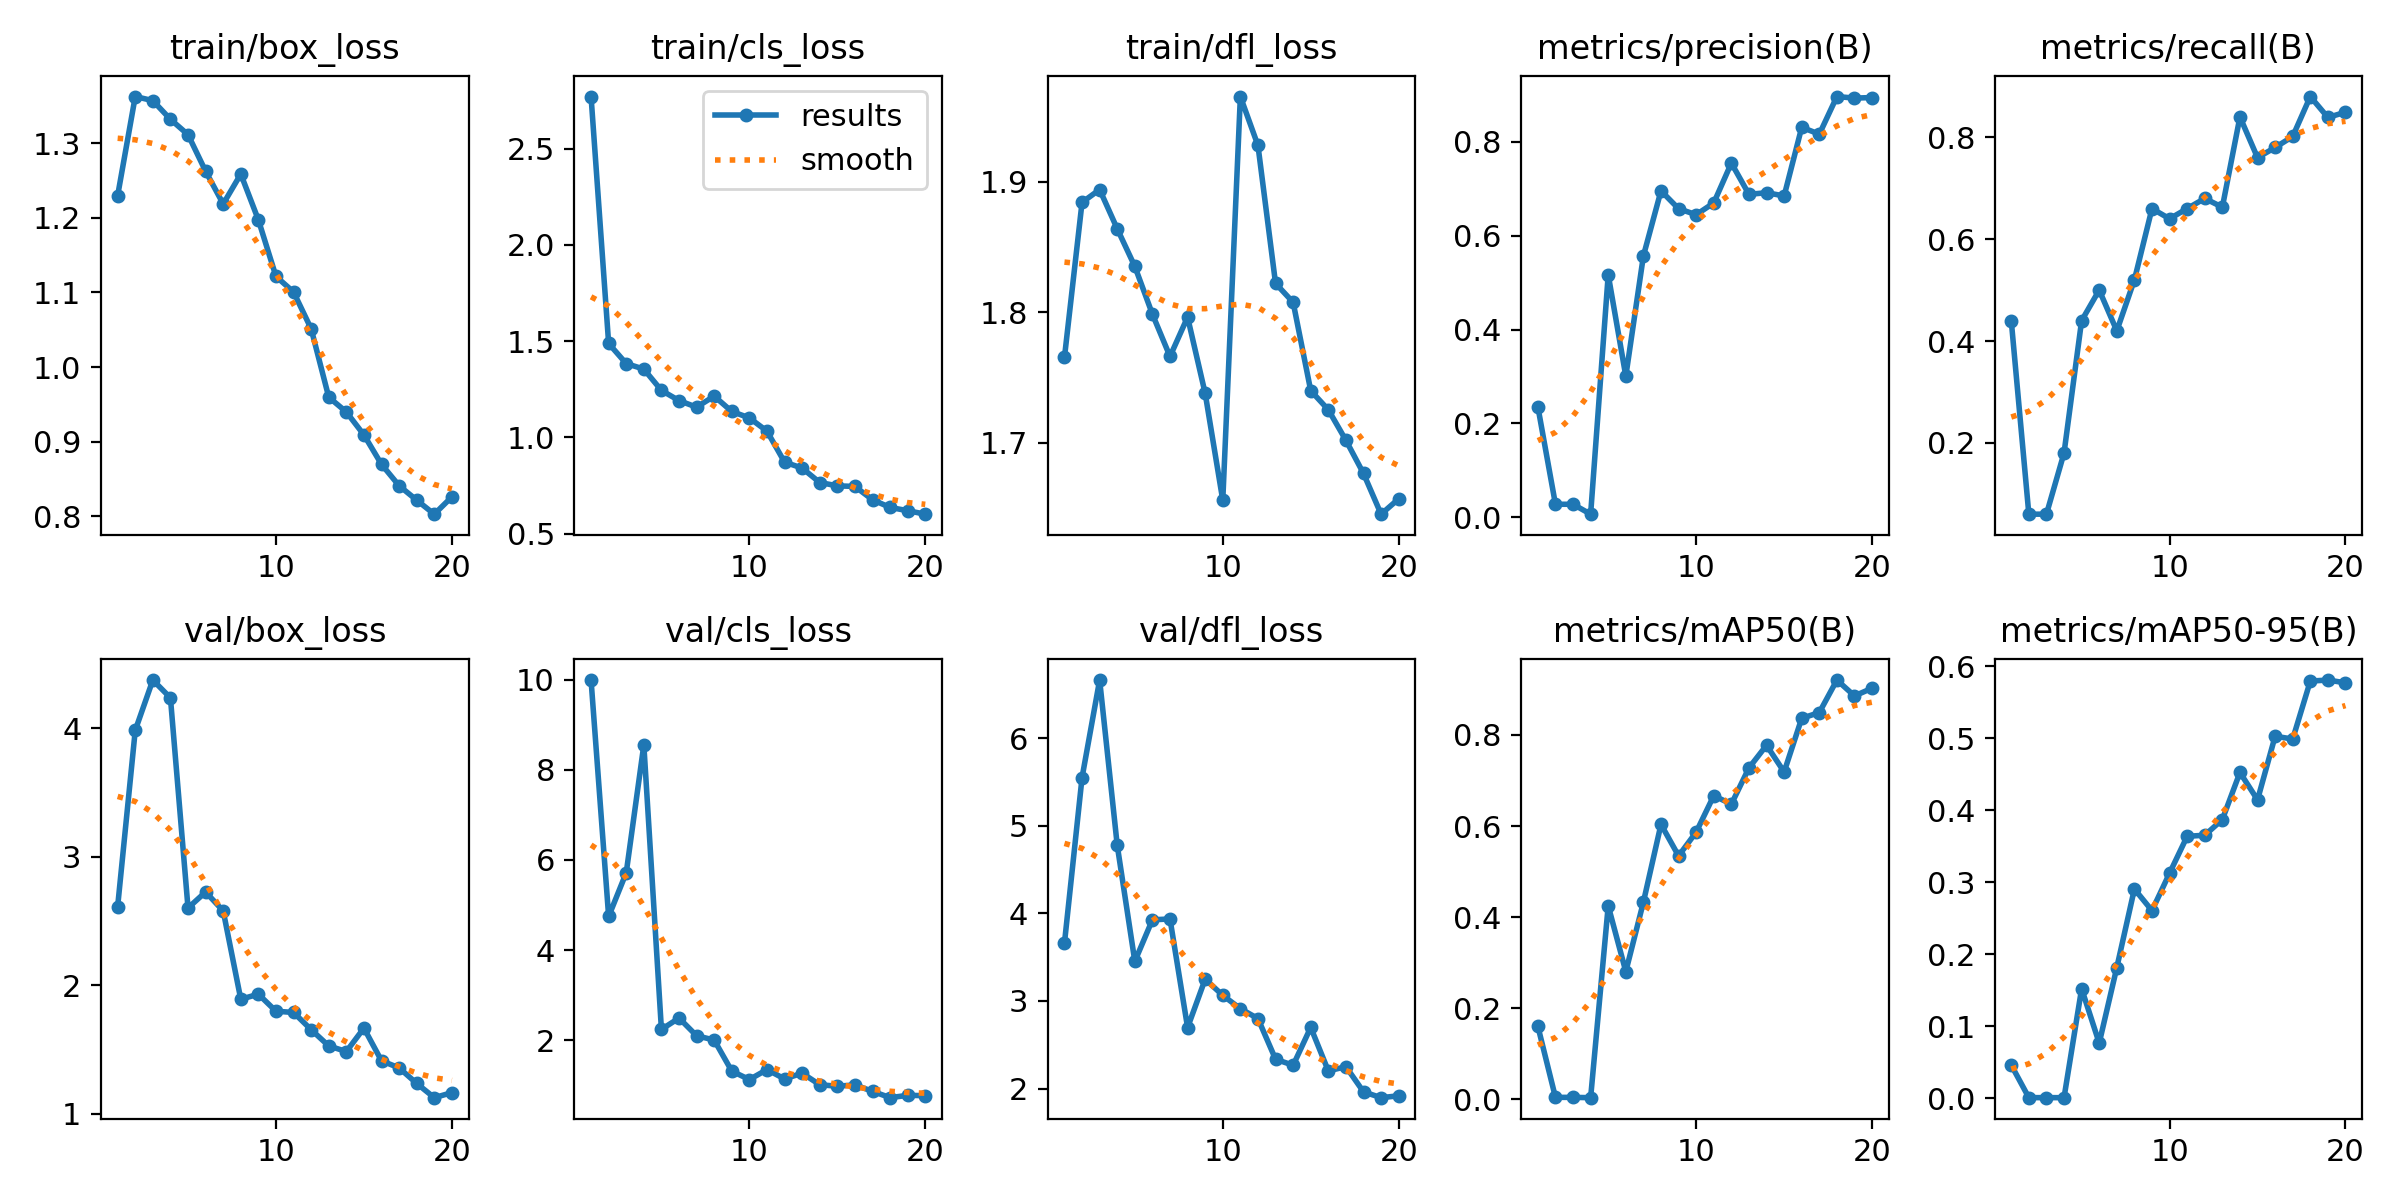

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

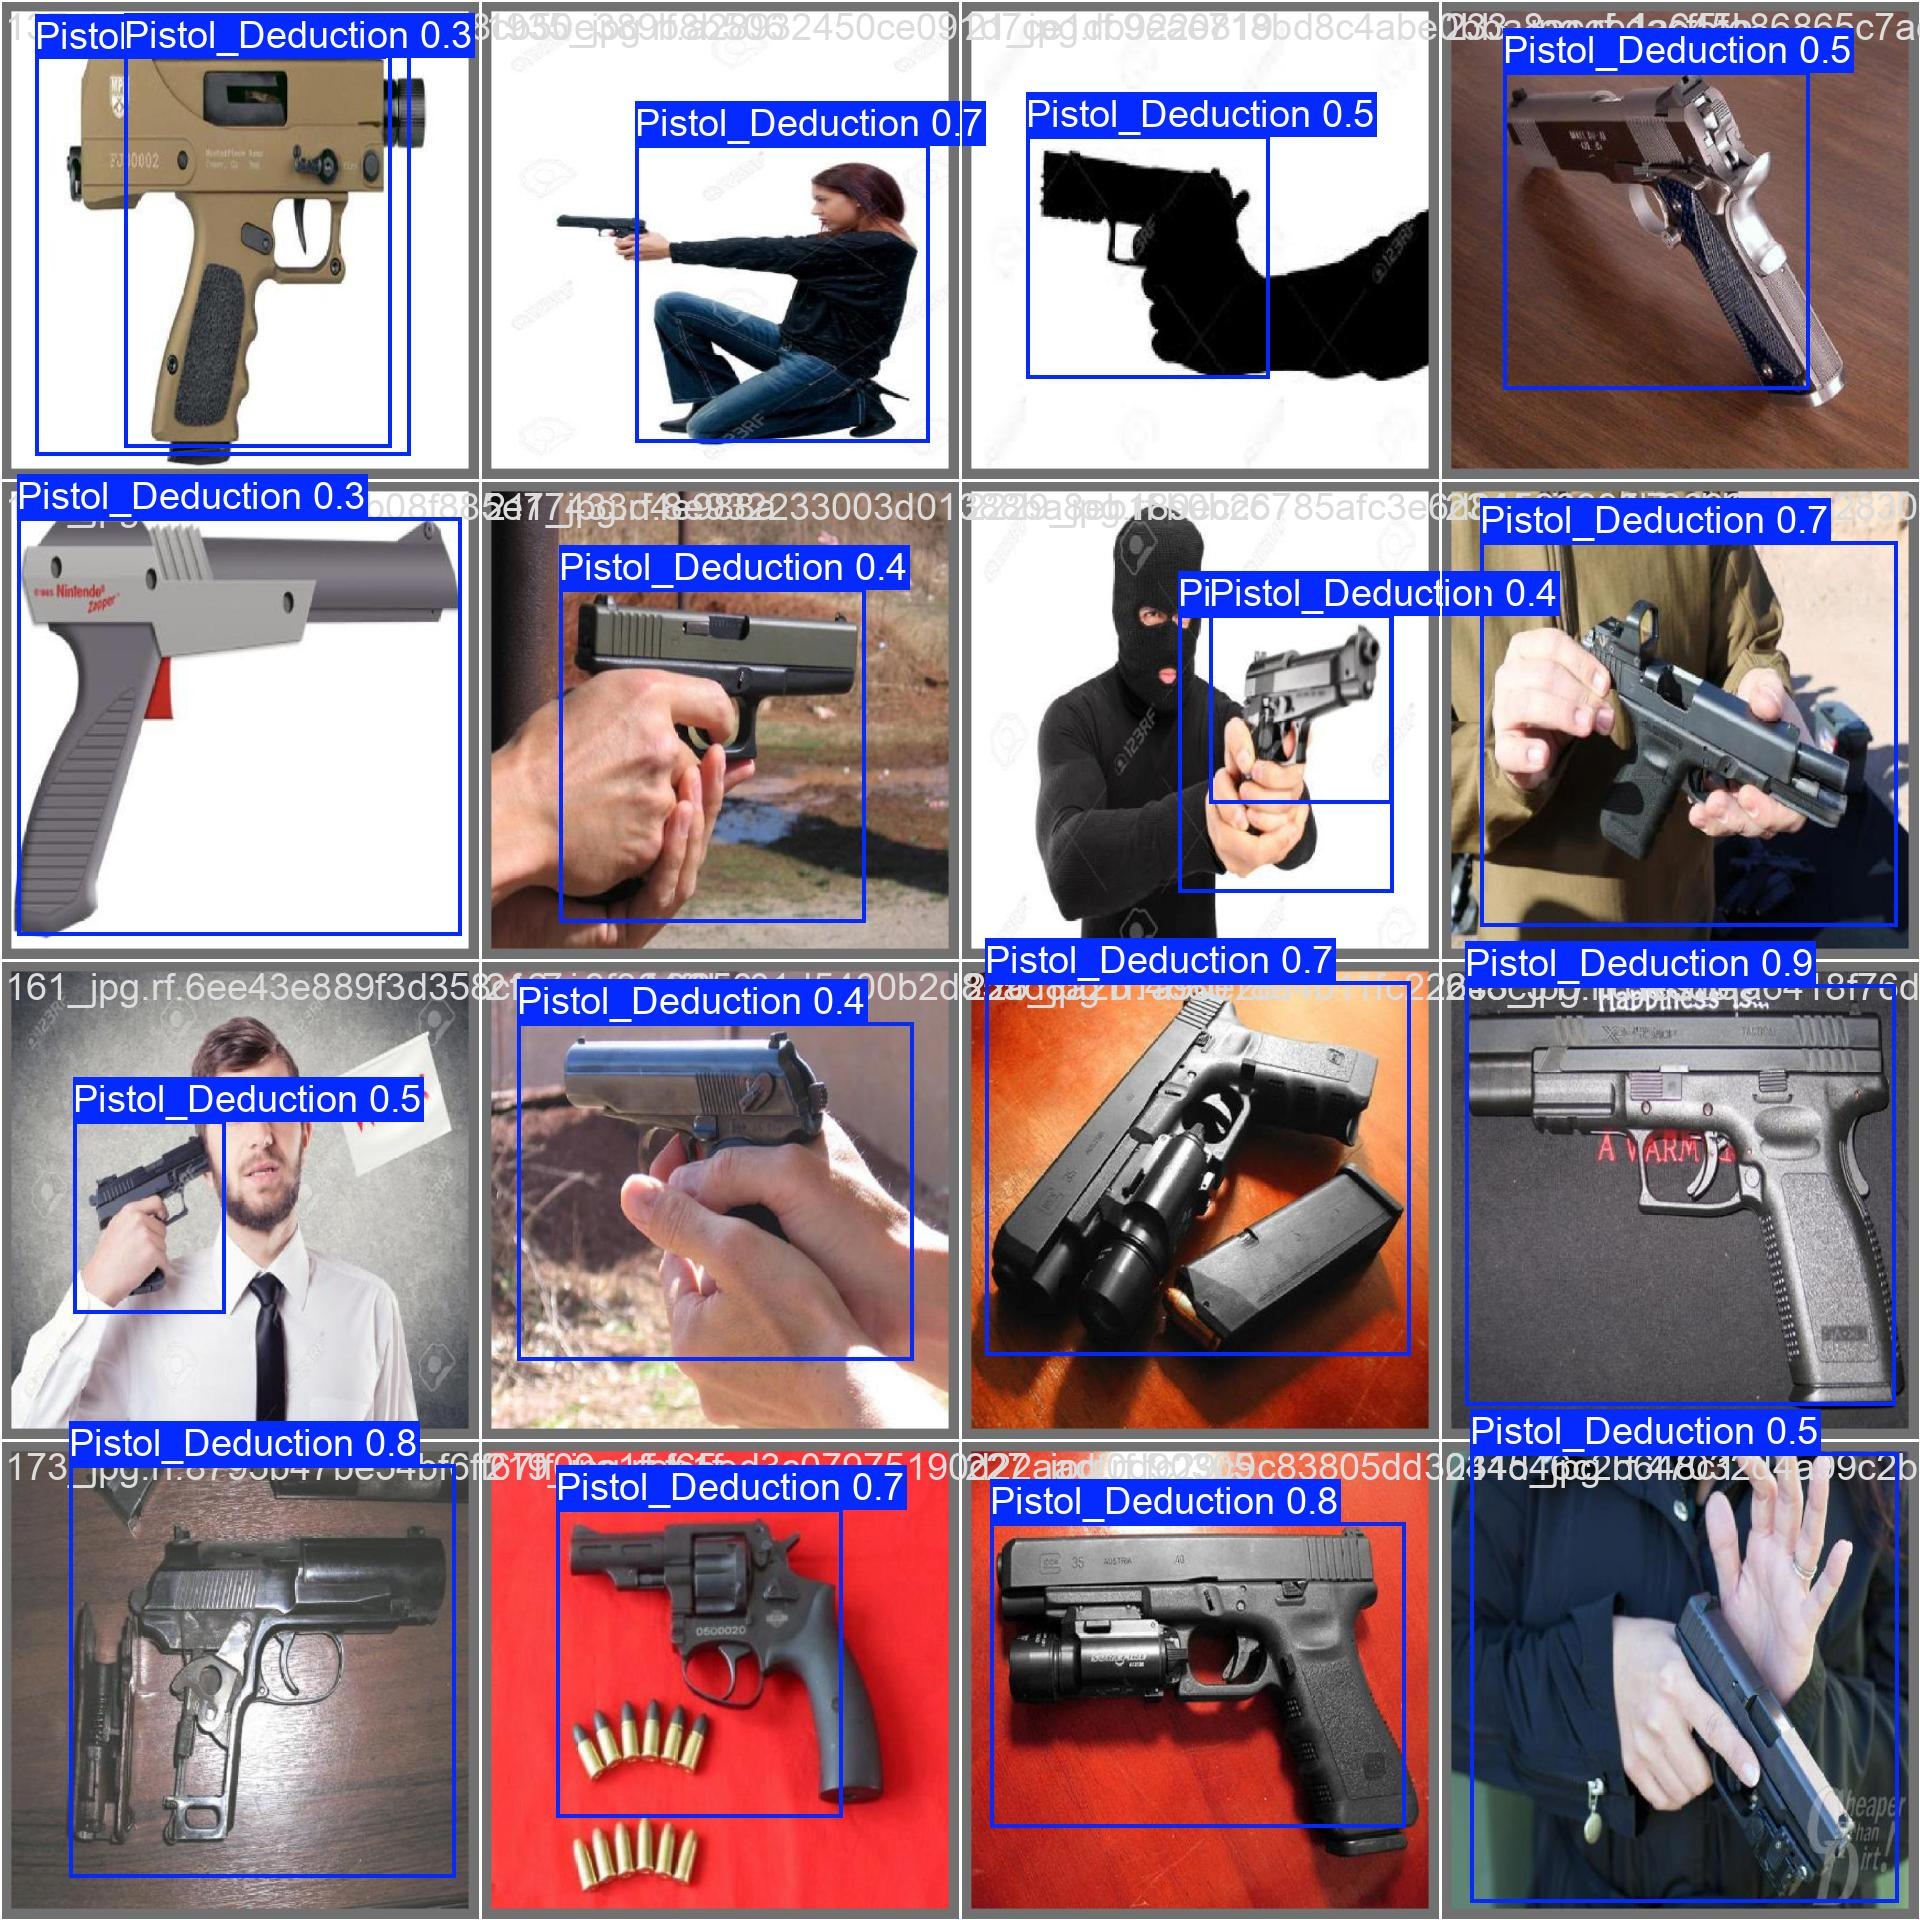

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [12]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Pistol_Deduction-2/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:01<00:00,  2.20it/s]
                   all         50         50      0.896      0.863       0.92      0.579
Speed: 7.4ms preprocess, 14.7ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [13]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/15 /content/datasets/Pistol_Deduction-2/test/images/132_jpg.rf.3a8f1aec351973482dc2819899f2db93.jpg: 640x640 1 Pistol_Deduction, 15.6ms
image 2/15 /content/datasets/Pistol_Deduction-2/test/images/146_jpg.rf.39667bd7c7671f1b5628300a28923e78.jpg: 640x640 1 Pistol_Deduction, 15.7ms
image 3/15 /content/datasets/Pistol_Deduction-2/test/images/14_jpg.rf.8e7df7b12f04d44af75b156410c7cc75.jpg: 640x640 1 Pistol_Deduction, 15.6ms
image 4/15 /content/datasets/Pistol_Deduction-2/test/images/192_jpg.rf.2a8fc906dfdc46a11a8e6f2019703198.jpg: 640x640 1 Pistol_Deduction, 15.6ms
image 5/15 /content/datasets/Pistol_Deduction-2/test/images/2256_jpg.rf.9b0b2a68d42b8da779b6a5aa60ff9c7c.jpg: 640x640 1 Pistol_Deduction, 15.6ms
image 6/15 /content/datasets/Pistol_Deduction-2/test/images/2619_jpg.rf.bdf6b39c78cf236cb4f26548a4056284.jpg: 640

**NOTE:** Let's take a look at few results.

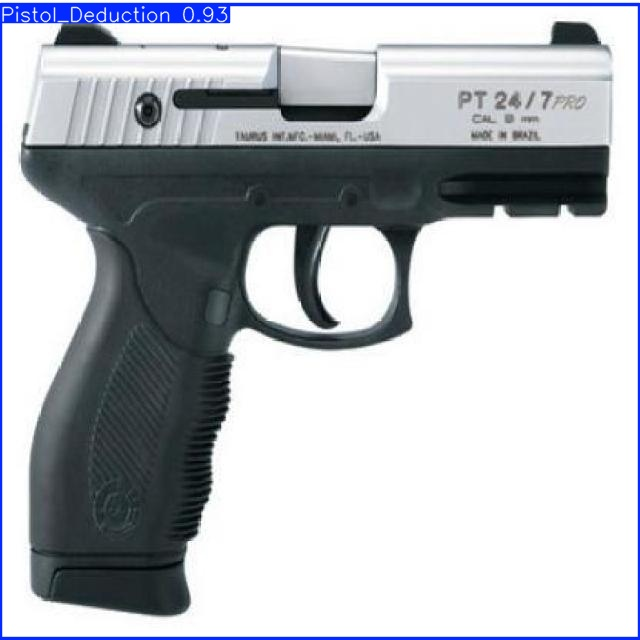

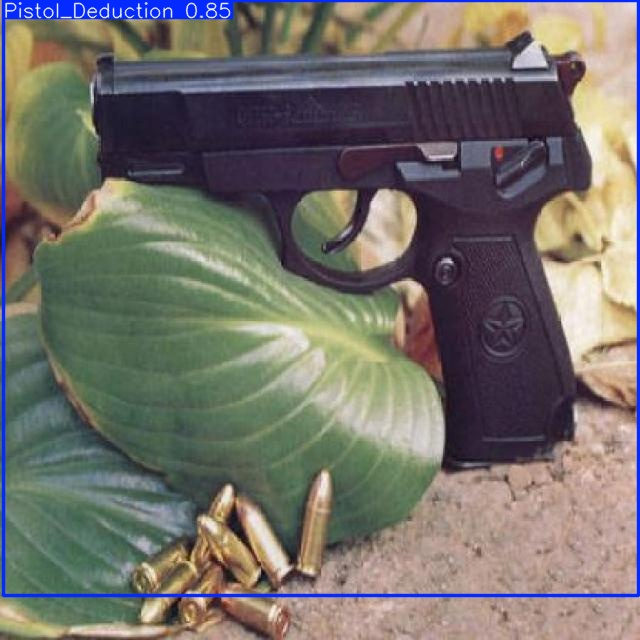

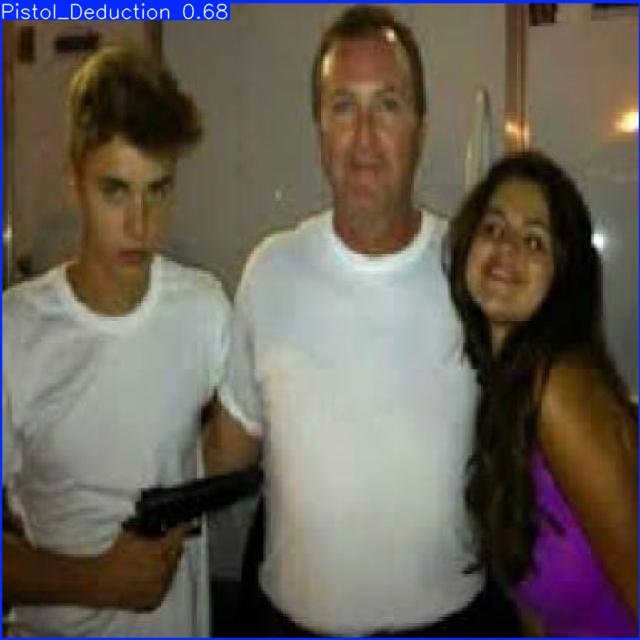

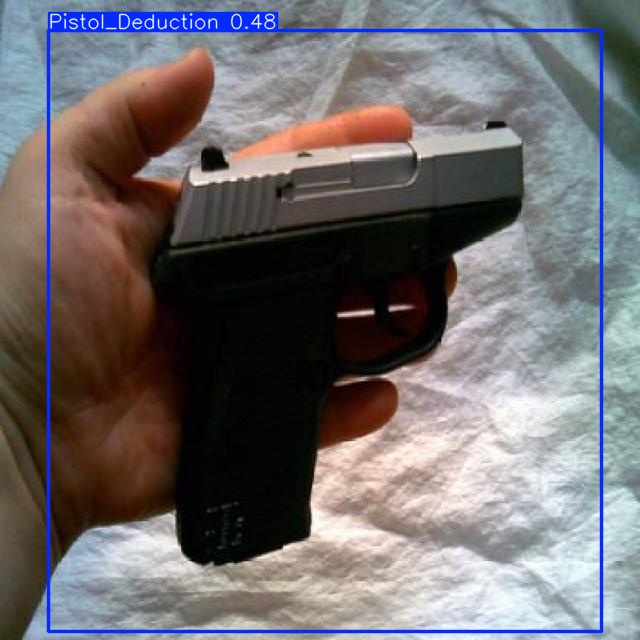

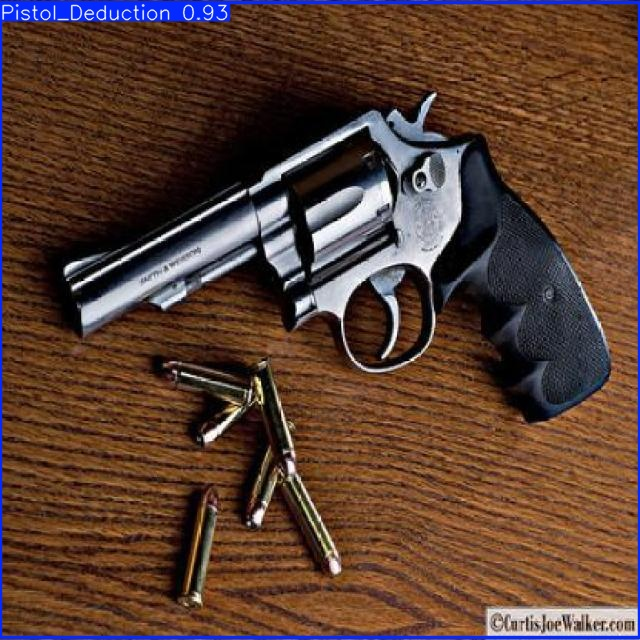

In [28]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:5]:
    display(IPyImage(filename=img, width=600))
    print("\n")